In [6]:
# import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


In [7]:
# define stock tickers for potilfolio (Apple, Tesla, S&P 500)
tickers = ["AAPL", "TSLA","^GSPC"] #  ^GSPC = S&P 500

In [8]:
# Download historical data
data = yf.download(tickers,start = "2022-01-01", end = "2025-01-01")["Close"]
data

[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,TSLA,^GSPC
Date,,,
2022-01-03,178.879883,399.926666,4796.560059
2022-01-04,176.609634,383.196655,4793.540039
2022-01-05,171.911819,362.706665,4700.580078
2022-01-06,169.042053,354.899994,4696.049805
2022-01-07,169.209137,342.320007,4677.029785
...,...,...,...
2024-12-24,257.916443,462.279999,6040.040039
2024-12-26,258.735504,454.130005,6037.589844
2024-12-27,255.309296,431.660004,5970.839844


In [9]:
print(data.columns)

Index(['AAPL', 'TSLA', '^GSPC'], dtype='object', name='Ticker')


In [10]:
#calculate daily returns
returns = data.pct_change().dropna()
print(returns)
print(returns.std())

Ticker          AAPL      TSLA     ^GSPC
Date                                    
2022-01-04 -0.012691 -0.041833 -0.000630
2022-01-05 -0.026600 -0.053471 -0.019393
2022-01-06 -0.016693 -0.021523 -0.000964
2022-01-07  0.000988 -0.035447 -0.004050
2022-01-10  0.000116  0.030342 -0.001441
...              ...       ...       ...
2024-12-24  0.011478  0.073572  0.011043
2024-12-26  0.003176 -0.017630 -0.000406
2024-12-27 -0.013242 -0.049479 -0.011056
2024-12-30 -0.013263 -0.033012 -0.010702
2024-12-31 -0.007058 -0.032510 -0.004285

[752 rows x 3 columns]
Ticker
AAPL     0.017067
TSLA     0.038618
^GSPC    0.011023
dtype: float64


In [11]:

# Summary statistics
summary_stats = returns.describe().T
summary_stats["skewness"] = returns.skew()
summary_stats["kurtosis"] = returns.kurtosis()
print(summary_stats)

        count      mean       std       min       25%       50%       75%  \
Ticker                                                                      
AAPL    752.0  0.000591  0.017067 -0.058680 -0.008437  0.001118  0.009751   
TSLA    752.0  0.000755  0.038618 -0.123346 -0.020363  0.000998  0.020849   
^GSPC   752.0  0.000332  0.011023 -0.043237 -0.005785  0.000250  0.006728   

             max  skewness  kurtosis  
Ticker                                
AAPL    0.088975  0.213379  2.514831  
TSLA    0.219190  0.245814  2.193303  
^GSPC   0.055434 -0.159761  1.810109  


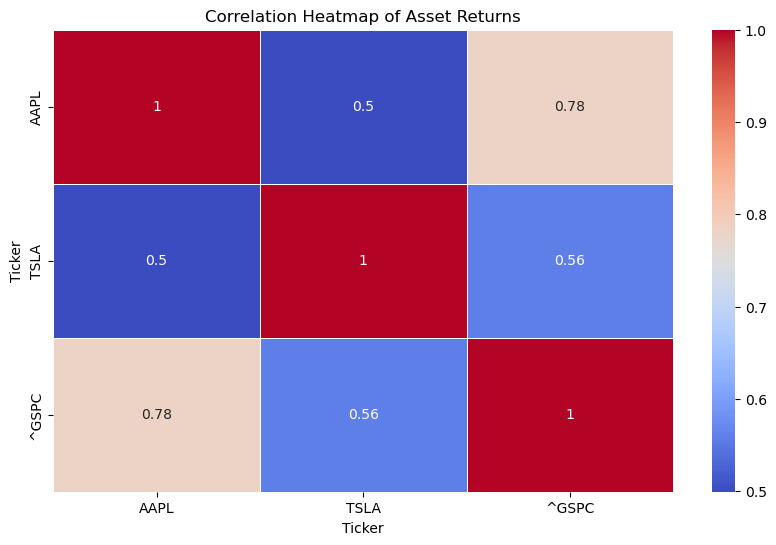

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Asset Returns")
plt.show()

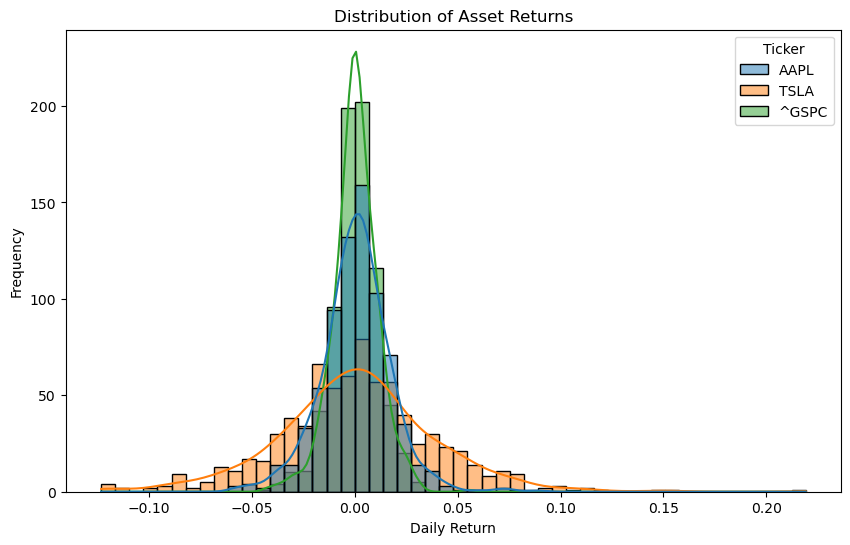

In [17]:
#Histogram & KDE Plot for Return Distributions
plt.figure(figsize=(10, 6))
sns.histplot(returns, bins=50, kde=True)
plt.title("Distribution of Asset Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

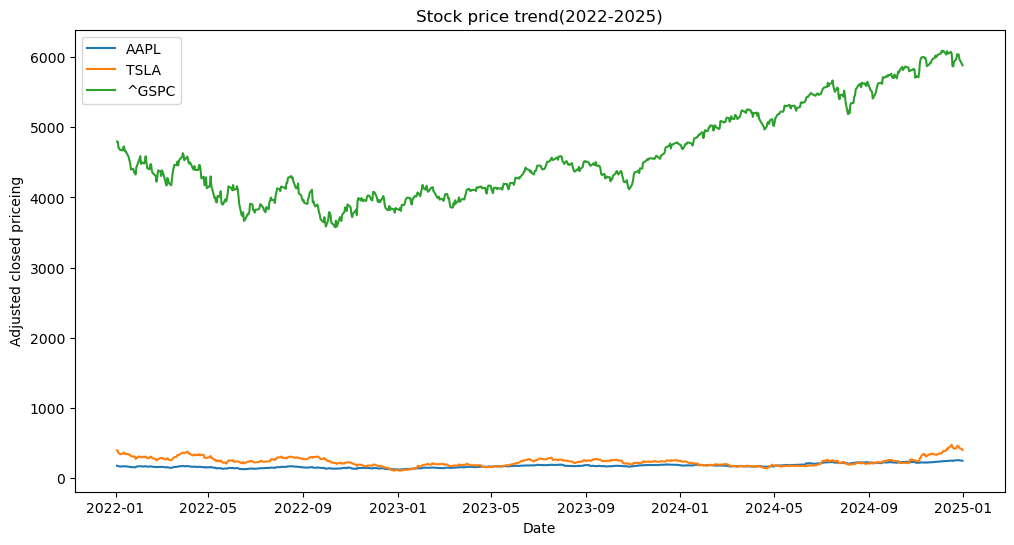

In [7]:
# Historical stock price
plt.figure(figsize =(12,6))
for stock in data.columns:
    plt.plot(data.index,data[stock],label = stock)
plt.title("Stock price trend(2022-2025)")
plt.xlabel("Date")
plt.ylabel("Adjusted closed priceing")
plt.legend()
plt.show

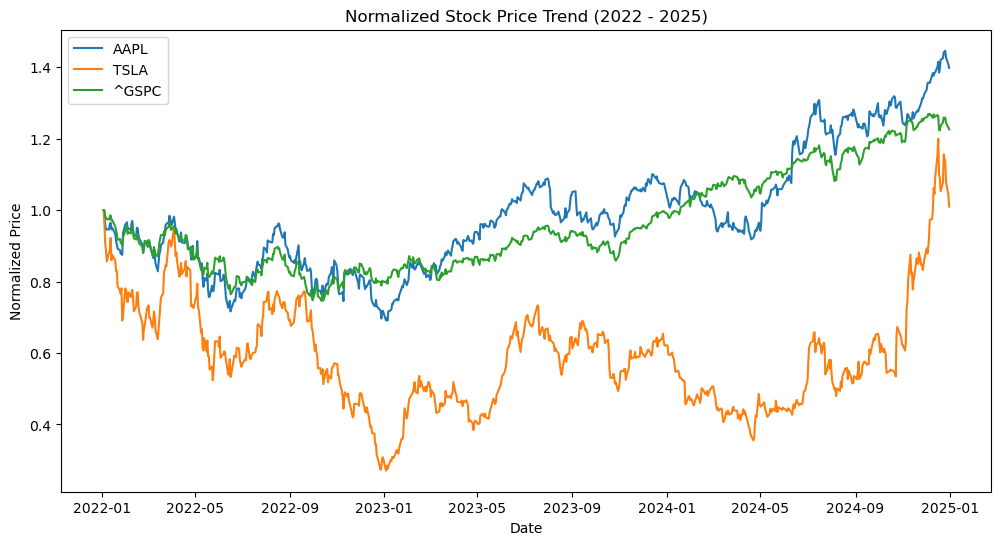

In [8]:
normalized_data = data / data.iloc[0]  # Divide each column by its first value
plt.figure(figsize=(12, 6))

for stock in normalized_data.columns:
    plt.plot(normalized_data.index, normalized_data[stock], label=stock)

plt.title("Normalized Stock Price Trend (2022 - 2025)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()


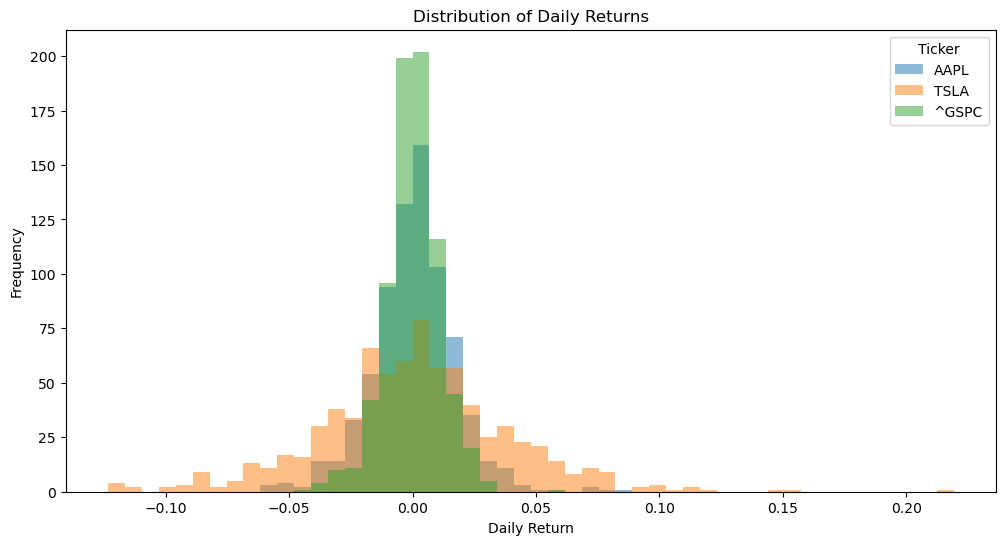

In [9]:
# Ploting daily distrubution
returns.plot(kind = "hist", bins = 50,  alpha =0.5, figsize =(12,6))
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.show()


## Calculating value at risk useing historical method

In [10]:
import numpy as np

# confidence level (95%)
confidence = 0.05 # worst case lose

weights =np.array([1/3, 1/3, 1/3])

portifolio_returns = returns.dot(weights)

VaR_95 = np.percentile(portifolio_returns,confidence*100)
print(f"Historical VaR (95% confidence): {VaR_95:.4f} or {-VaR_95*100: .4f}% lose")


Historical VaR (95% confidence): -0.0316 or  3.1619% lose


<function matplotlib.pyplot.show(close=None, block=None)>

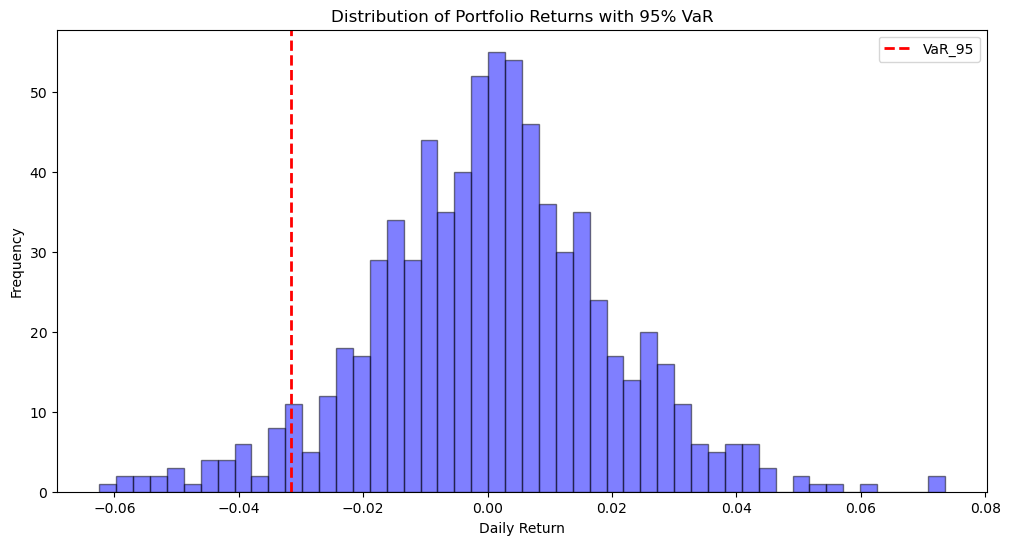

In [11]:
plt.figure(figsize=(12,6))
plt.hist(portifolio_returns, bins=50, alpha=0.5, color = "blue", edgecolor="Black")
plt.axvline(VaR_95, color ="red", linestyle = "dashed", linewidth = 2, label = "VaR_95")
plt.title("Distribution of Portfolio Returns with 95% VaR")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show

# Compareing VaR accross different assets

In [12]:
VaR_assets = returns.quantile(confidence)
print("The 95% VaR accross differnt assets are:")
print(VaR_assets)

The 95% VaR accross differnt assets are:
Ticker
AAPL    -0.027195
TSLA    -0.063209
^GSPC   -0.017546
Name: 0.05, dtype: float64


# Parametric (Variance-Covariance) VaR

In [13]:
# Finding Z score for 95%
from scipy.stats import norm

confidence_level = 0.95
z_score = norm.ppf(confidence_level)
print(f"the z score of 95% is: {z_score:.4f}")


the z score of 95% is: 1.6449


In [14]:
# Parametric (Variance-Covariance) VaR
mean_returns = portifolio_returns.mean()
std_dev = portifolio_returns.std()
z_score = 1.645
var_parametric = mean_returns - (z_score*std_dev)
print(f"var_parametric: {var_parametric:.4f} or {-var_parametric*100:.2f}% loss")



var_parametric: -0.0311 or 3.11% loss


#  Monte Carlo Simulation for VaR

In [15]:
confidence = 0.05
simulations = 10000 #no of simulations
simulated_returns = np.random.choice(portifolio_returns, size = simulations, replace = True)
VaR_monte_carlo = np.percentile(simulated_returns, confidence*100)
print(f" Monte carlo VaR:{VaR_monte_carlo:.4f} or {-VaR_monte_carlo*100:.4f}% loss")

 Monte carlo VaR:-0.0321 or 3.2082% loss


# Visualizing Historical, Parametric, and Monte Carlo  VaR estimates on histograms

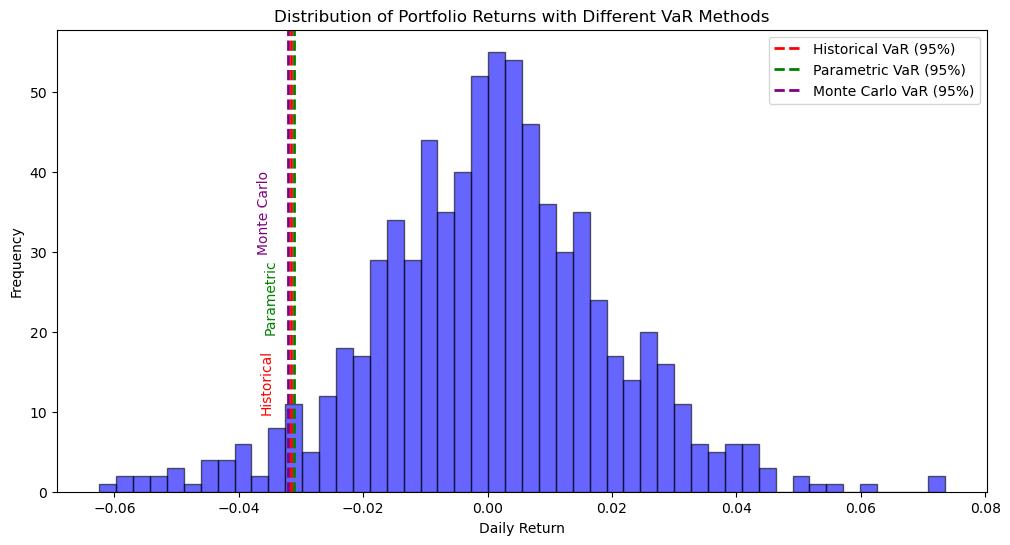

In [16]:
plt.figure(figsize = (12,6))
plt.hist(portifolio_returns, bins=50, alpha=0.6, color="blue", edgecolor="black")
#VaR lines
plt.axvline(VaR_95, color="red", linestyle="dashed", linewidth=2, label="Historical VaR (95%)")
plt.axvline(var_parametric, color="green", linestyle="dashed", linewidth=2, label="Parametric VaR (95%)")
plt.axvline(VaR_monte_carlo, color="purple", linestyle="dashed", linewidth=2, label="Monte Carlo VaR (95%)")
# Anotaions
plt.text(VaR_95 - 0.005, 10, "Historical", color="red", fontsize=10, rotation=90)
plt.text(var_parametric - 0.005, 20, "Parametric", color="green", fontsize=10, rotation=90)
plt.text(VaR_monte_carlo - 0.005, 30, "Monte Carlo", color="purple", fontsize=10, rotation=90)

plt.title("Distribution of Portfolio Returns with Different VaR Methods")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()


#  Compare 95% VaR vs. 99% VaR

In [17]:
# Updateing confidence level

confidence_99 = 0.01
confidence_95 = 0.05

# VaR useing historical method

VaR_99_hist = portifolio_returns.quantile(confidence_99)
VaR_95_hist = portifolio_returns.quantile(confidence_95)

print(f"VaR useing historical method for 99% confidence level is: {VaR_99_hist:.4f} or {-VaR_99_hist*100}% lose")
print(f"VaR useing historical method for 95% confidence level is: {VaR_95_hist:.4f} or {-VaR_95_hist*100}% lose")

VaR useing historical method for 99% confidence level is: -0.0498 or 4.981163557702908% lose
VaR useing historical method for 95% confidence level is: -0.0316 or 3.1619343193642284% lose


In [18]:
# VaR usein Parametric method
z_95 = 1.645
z_99 = 2.326

mean_returns = portifolio_returns.mean()
std_returns = portifolio_returns.std()

parametric_VaR_95 = mean_returns - z_95*std_returns
parametric_VaR_99 = mean_returns - z_99*std_returns

print(f"VaR useing Parametric method for 99% confidence level is: {parametric_VaR_99:.4f} or {-parametric_VaR_99*100}% lose")
print(f"VaR useing Parametric method for 95% confidence level is: {parametric_VaR_95:.4f} or {-parametric_VaR_95*100}% lose")





VaR useing Parametric method for 99% confidence level is: -0.0442 or 4.419891510505916% lose
VaR useing Parametric method for 95% confidence level is: -0.0311 or 3.1094721510908854% lose


In [19]:
# VaR using monte carlo method
simulations = 10000
simulation_returns= np.random.choice(portifolio_returns,size = simulations, replace= True)
VaR_99 = np.percentile(simulation_returns, confidence_99*100)
VaR_95 = np.percentile(simulation_returns, confidence_95*100)
print(f"VaR useing monte carlo method for 99% confidence level is: {VaR_99:.4f} or {-VaR_99*100}% lose")
print(f"VaR useing monte carlo method for 95% confidence level is: {VaR_95:.4f} or {-VaR_95*100}% lose")





VaR useing monte carlo method for 99% confidence level is: -0.0490 or 4.90321532238321% lose
VaR useing monte carlo method for 95% confidence level is: -0.0302 or 3.0240456539923537% lose


# Visualizing Tail Risk

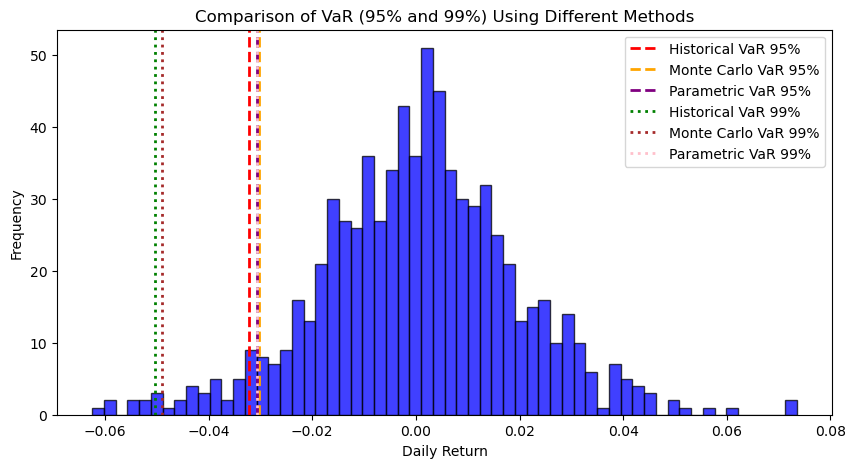

In [20]:
import matplotlib.pyplot as plt

offset = 0.0005 

# Plot histogram of portfolio returns
plt.figure(figsize=(10, 5))
plt.hist(portifolio_returns, bins=60, alpha=0.75, color="blue", edgecolor="black")

# Add VaR levels for each method
plt.axvline(VaR_95_hist - offset, color="red" , linestyle="dashed", linewidth=2, label="Historical VaR 95%")
plt.axvline(VaR_95, color="orange", linestyle="dashed", linewidth=2, label="Monte Carlo VaR 95%")
plt.axvline(parametric_VaR_95 + offset, color="purple", linestyle="dashed", linewidth=2, label="Parametric VaR 95%")

plt.axvline(VaR_99_hist- offset, color="green" , linestyle="dotted", linewidth=2, label="Historical VaR 99%")
plt.axvline(VaR_99, color="brown", linestyle="dotted", linewidth=2, label="Monte Carlo VaR 99%")
plt.axvline(parametric_VaR_95 + offset, color="pink", linestyle="dotted", linewidth=2, label="Parametric VaR 99%")

# Labels and legend
plt.title("Comparison of VaR (95% and 99%) Using Different Methods")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [25]:
 
portifolio_returns.to_csv("portfolio_returns.csv", index=True)  


In [3]:
import pandas as pd

# Load the .xls file
file_path = r"C:\Users\amalm\OneDrive\Desktop\Amal\portifolio_returns.csv"
df = pd.read_csv(file_path)

# Save as .xlsx
df.to_excel("portfolio_returns.xlsx", index=False)
